In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [23]:
'''
< Column >
id : 선수 고유의 아이디
name : 이름
age : 나이
continent : 선수들의 국적이 포함되어 있는 대륙
contract_until : 선수의 계약기간이 언제까지
position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등
prefer_foot : 선수가 선호하는 발입니다. ex) 오른발
reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수
stat_overall : 선수의 현재 능력치 입니다.
stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도
stat_skill_moves : 선수의 개인기 능력치
value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로)

'''

'\n< Column >\nid : 선수 고유의 아이디\nname : 이름\nage : 나이\ncontinent : 선수들의 국적이 포함되어 있는 대륙\ncontract_until : 선수의 계약기간이 언제까지\nposition : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등\nprefer_foot : 선수가 선호하는 발입니다. ex) 오른발\nreputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수\nstat_overall : 선수의 현재 능력치 입니다.\nstat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도\nstat_skill_moves : 선수의 개인기 능력치\nvalue : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로)\n\n'

In [24]:
'''
< 데이터 처리 >

=> value(이적료)값 : 유로 -> 원
-> 

< 기본 >

1. 나이별 / 이적료
2. 대륙별 이적료 => 히트맵
3. 계약기간 별 이적료
4. 포지션별 이적료
5. 오른발,왼발에 따른 이적료
6. 유명한 정도에 따른 이적료
7. 현재 능력치별 이적료
8. 가능성별 이적료  => 미래의 투자
9. 개인기 능력치별 이적료

=> 이건 전부 3,3으로 한번에 그리기


10. 주 발이 어느 발이냐에 따라 현재 능력치, 개인기 능력치 확인
11. 주 발에 따라 어느 포지션이 많은지
12. 



'''

'\n< 데이터 처리 >\n\n=> value(이적료)값 : 유로 -> 원\n-> \n\n< 기본 >\n\n1. 나이별 / 이적료\n2. 대륙별 이적료 => 히트맵\n3. 계약기간 별 이적료\n4. 포지션별 이적료\n5. 오른발,왼발에 따른 이적료\n6. 유명한 정도에 따른 이적료\n7. 현재 능력치별 이적료\n8. 가능성별 이적료  => 미래의 투자\n9. 개인기 능력치별 이적료\n\n=> 이건 전부 3,3으로 한번에 그리기\n\n\n10. 주 발이 어느 발이냐에 따라 현재 능력치, 개인기 능력치 확인\n11. 주 발에 따라 어느 포지션이 많은지\n12. \n\n\n\n'

In [25]:
data = pd.read_csv('FIFA_train.csv')
data.head()

id          name  age      continent contract_until position prefer_foot  \
0   0      L. Messi   31  south america           2021       ST        left   
1   3        De Gea   27         europe           2020       GK       right   
2   7     L. Suárez   31  south america           2021       ST       right   
3   8  Sergio Ramos   32         europe           2020       DF       right   
4   9      J. Oblak   25         europe           2021       GK       right   

   reputation  stat_overall  stat_potential  stat_skill_moves        value  
0         5.0            94              94               4.0  110500000.0  
1         4.0            91              93               1.0   72000000.0  
2         5.0            91              91               3.0   80000000.0  
3         4.0            91              91               3.0   51000000.0  
4         3.0            90              93               1.0   68000000.0

In [26]:
m = data

In [27]:
data['stat_skill_moves'].value_counts()

2.0    3905
3.0    3473
1.0    1008
4.0     515
5.0      31
Name: stat_skill_moves, dtype: int64

In [28]:
data = data.drop(['id','name'], axis=1)
data

age      continent contract_until position prefer_foot  reputation  \
0      31  south america           2021       ST        left         5.0   
1      27         europe           2020       GK       right         4.0   
2      31  south america           2021       ST       right         5.0   
3      32         europe           2020       DF       right         4.0   
4      25         europe           2021       GK       right         3.0   
...   ...            ...            ...      ...         ...         ...   
8927   18         africa           2019       MF       right         1.0   
8928   19         europe           2020       DF       right         1.0   
8929   18  south america           2021       DF       right         1.0   
8930   18         europe           2021       GK       right         1.0   
8931   19         europe           2020       ST       right         1.0   

      stat_overall  stat_potential  stat_skill_moves        value  
0               94              94               4.0  110500000.0  
1               91              93               1.0   72000000.0  
2               91              91               3.0   80000000.0  
3               91              91               3.0   51000000.0  
4               90              93               1.0   68000000.0  
...            ...             ...               ...          ...  
8927            48              63               3.0      60000.0  
8928            47              59               2.0      40000.0  
8929            47              64               2.0      50000.0  
8930            47              65               1.0      50000.0  
8931            47              63               2.0      60000.0  

[8932 rows x 10 columns]

In [29]:
'''
선수의 현재 능력치는 약 85 이후부터 값이 변화함
data['stat_overall85'] = np.where(data.stat_overall > 85, 1, 0)

선수의 가능성은 90이상부터 값이 변화함
data['stat_overall85'] = np.where(data.stat_overall > 90, 1, 0)
'''


sns.pairplot(data)

In [33]:
X = data.iloc[:,:-1]

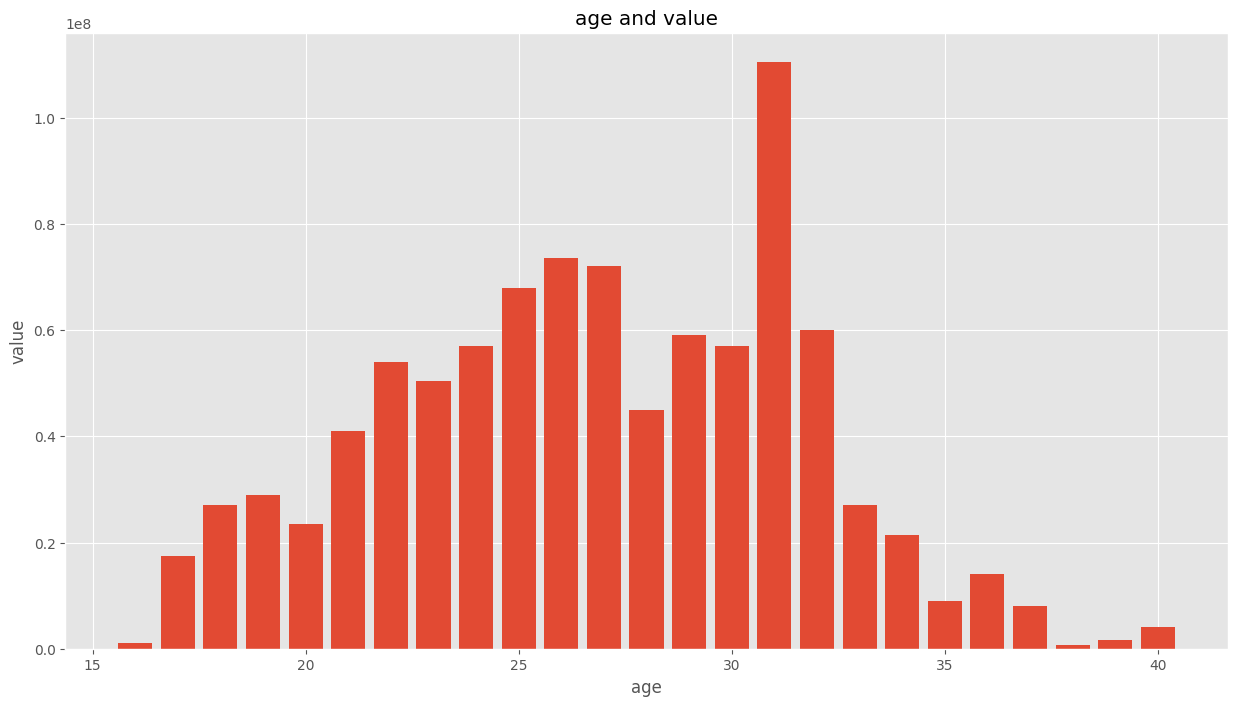

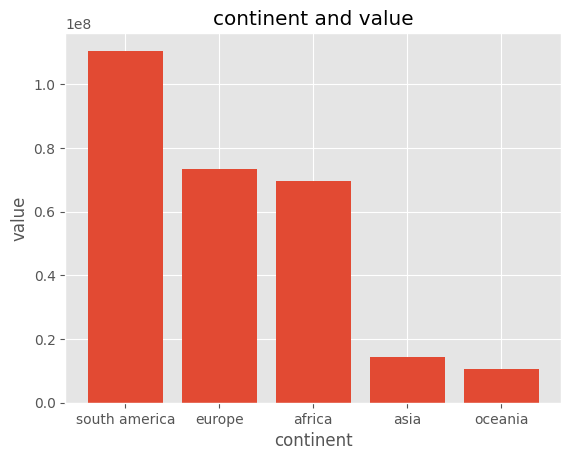

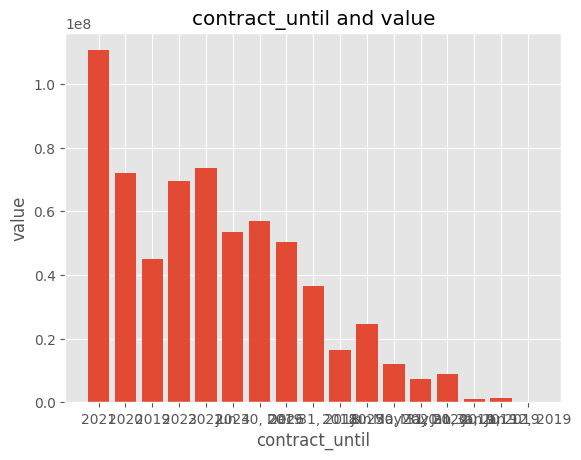

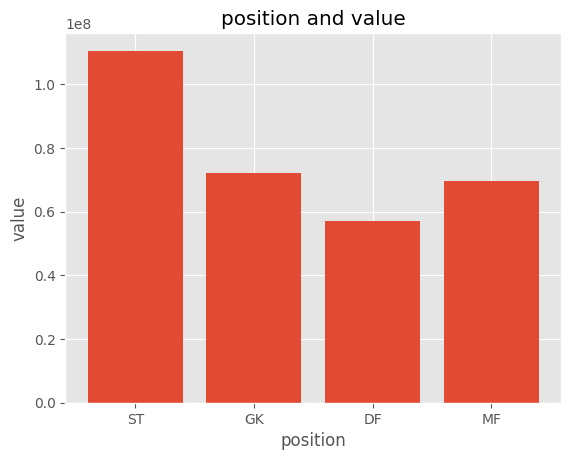

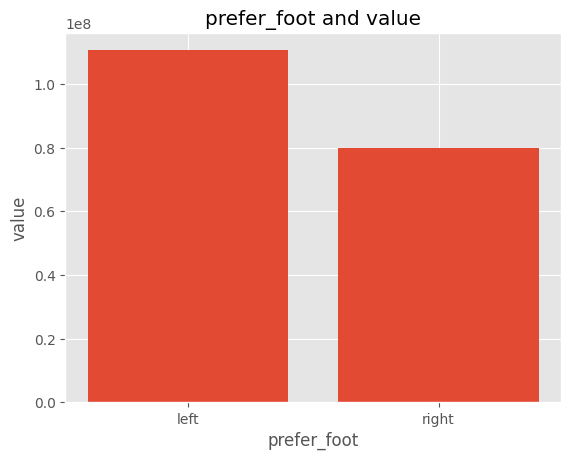

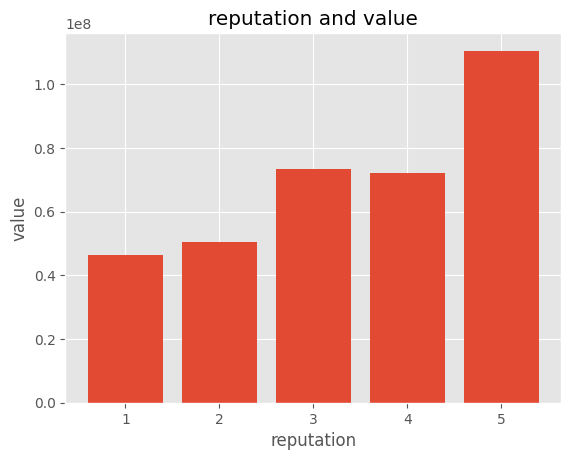

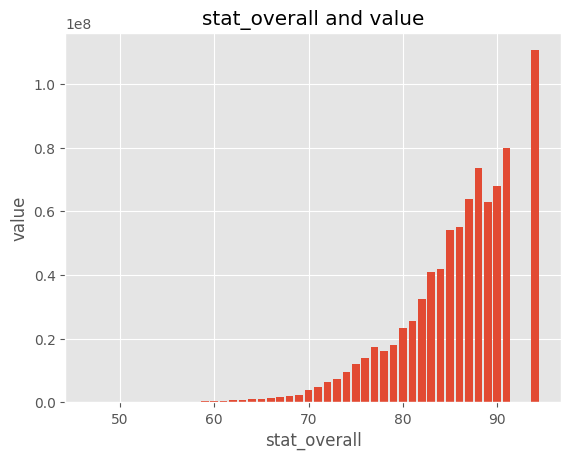

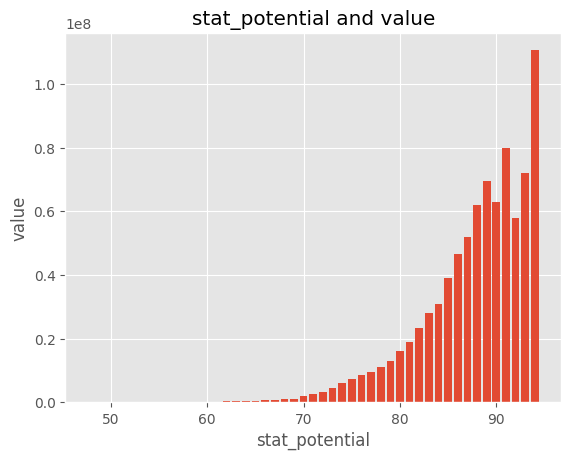

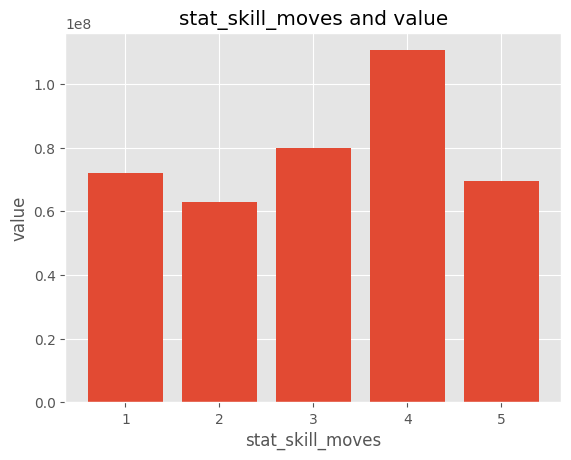

In [35]:
# colors = ['red','sienna','gold','forestgreen','navy','crimson']
plt.figure(figsize=(15,8))


for i, x in enumerate(X.columns):
    plt.bar(X.iloc[:,i],data['value'])
    plt.xlabel(x)
    plt.ylabel('value')
    plt.title(f'{x} and value')
    plt.show()

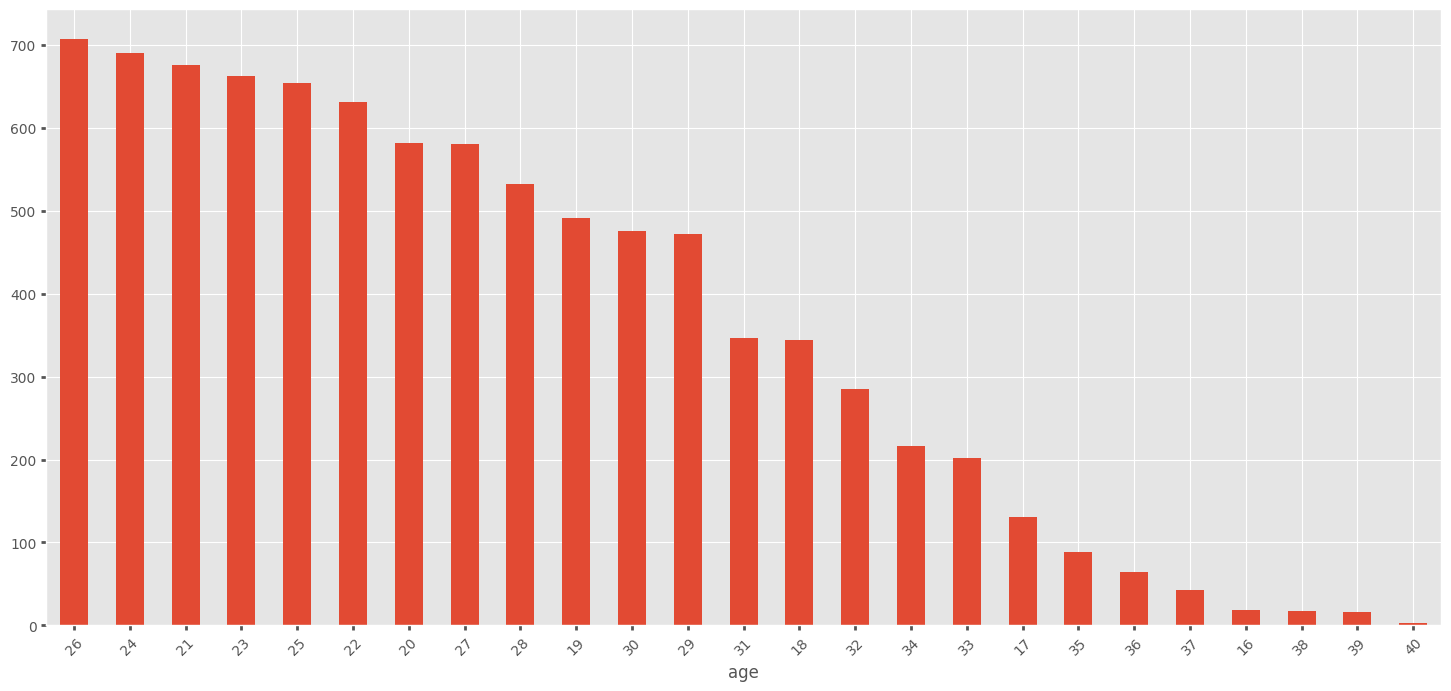

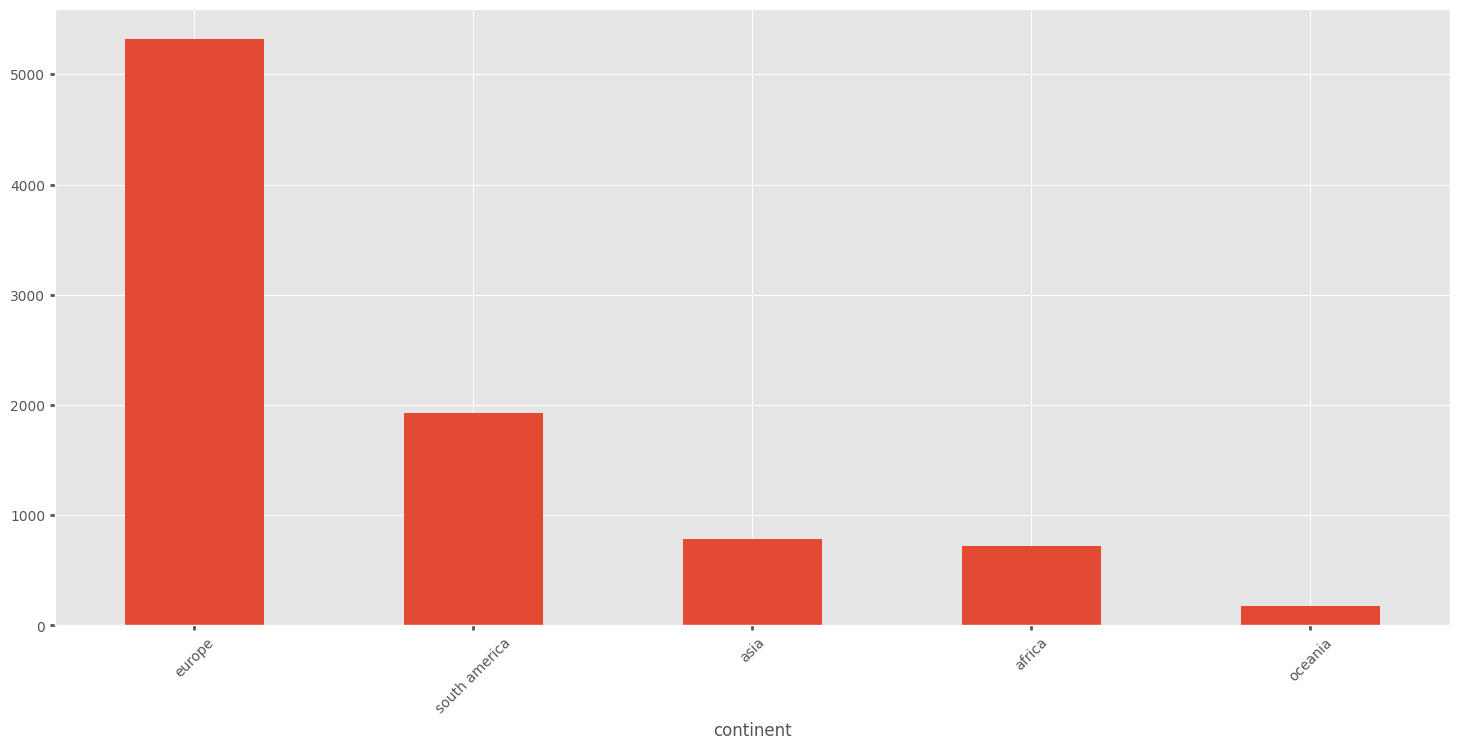

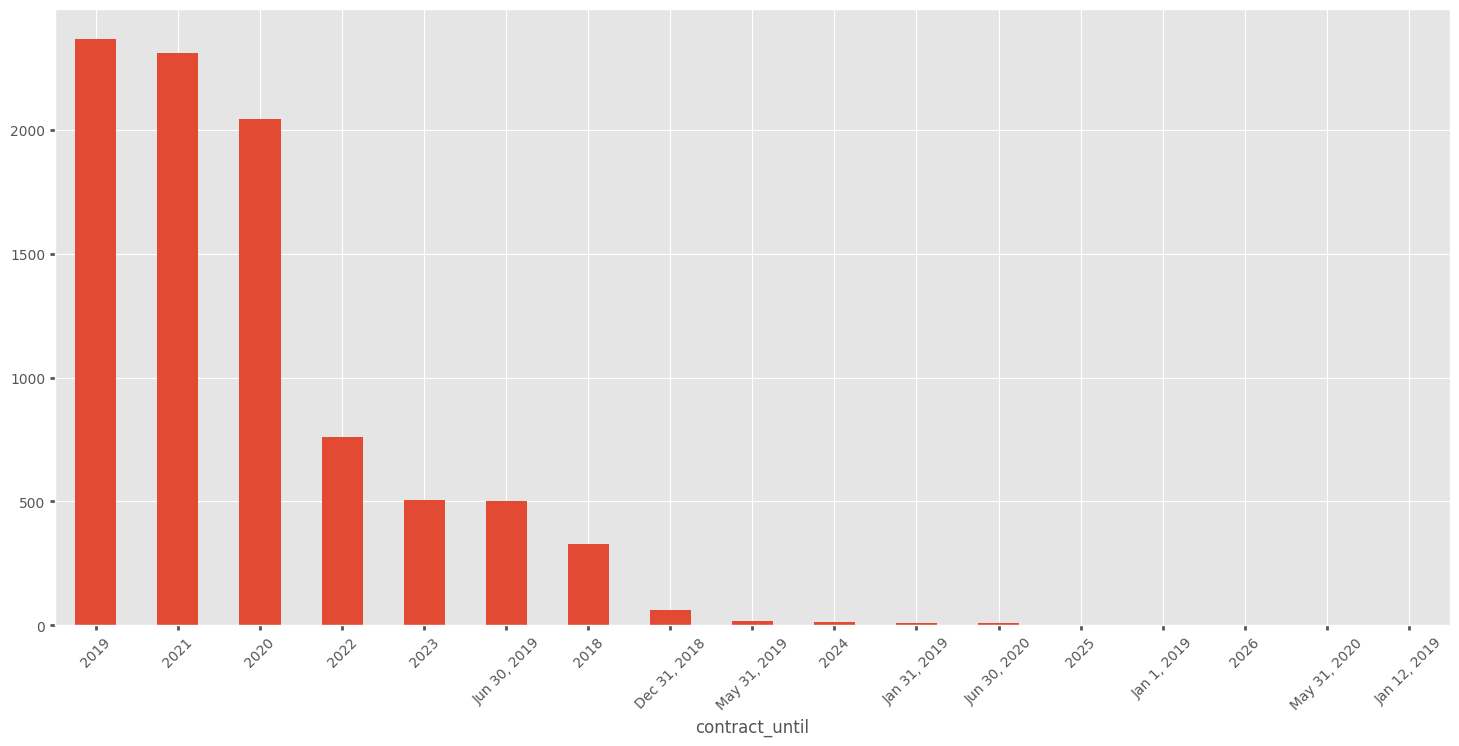

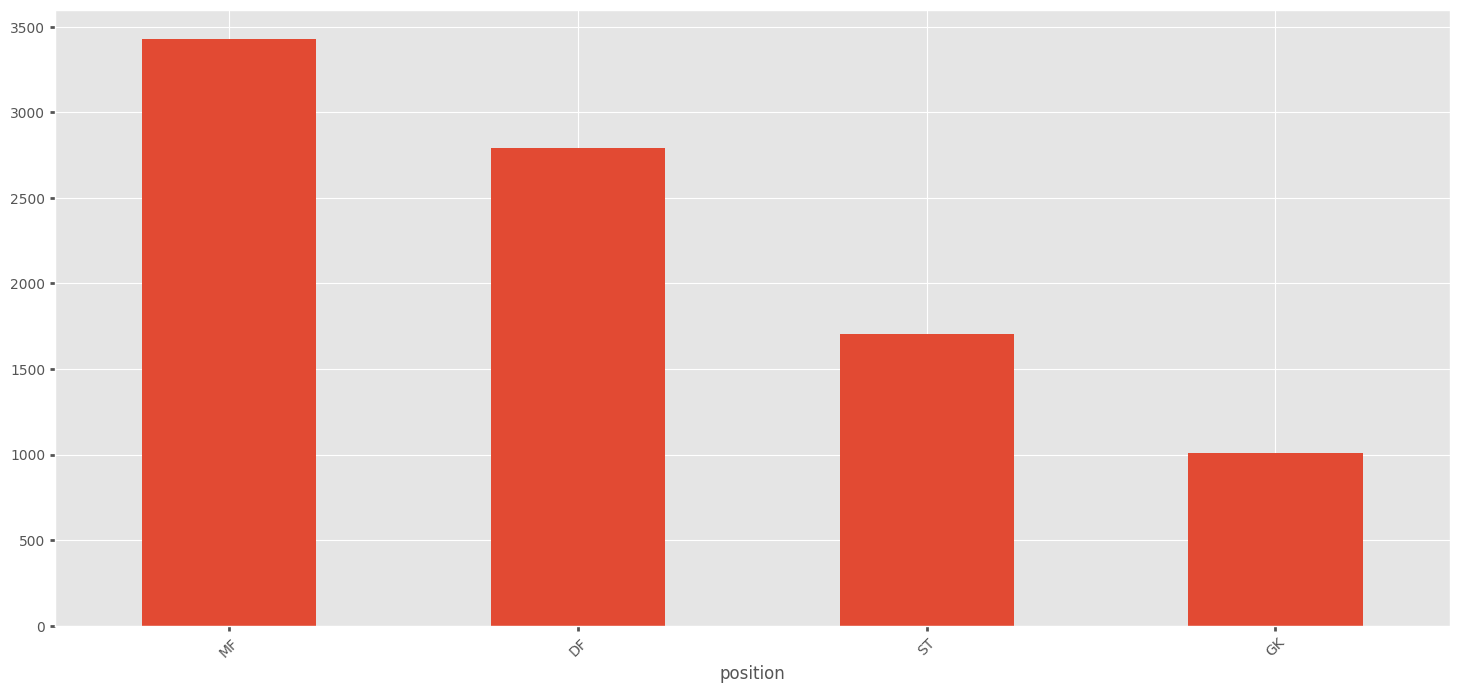

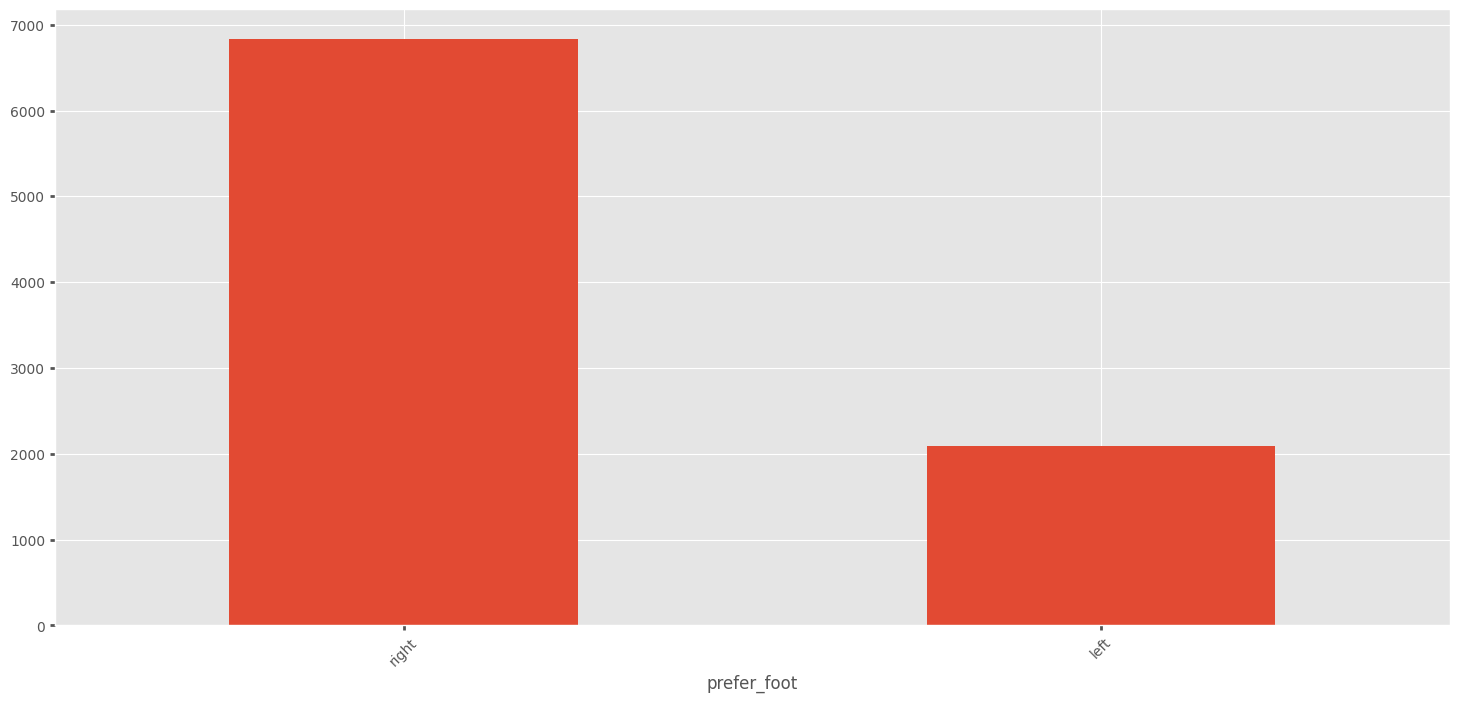

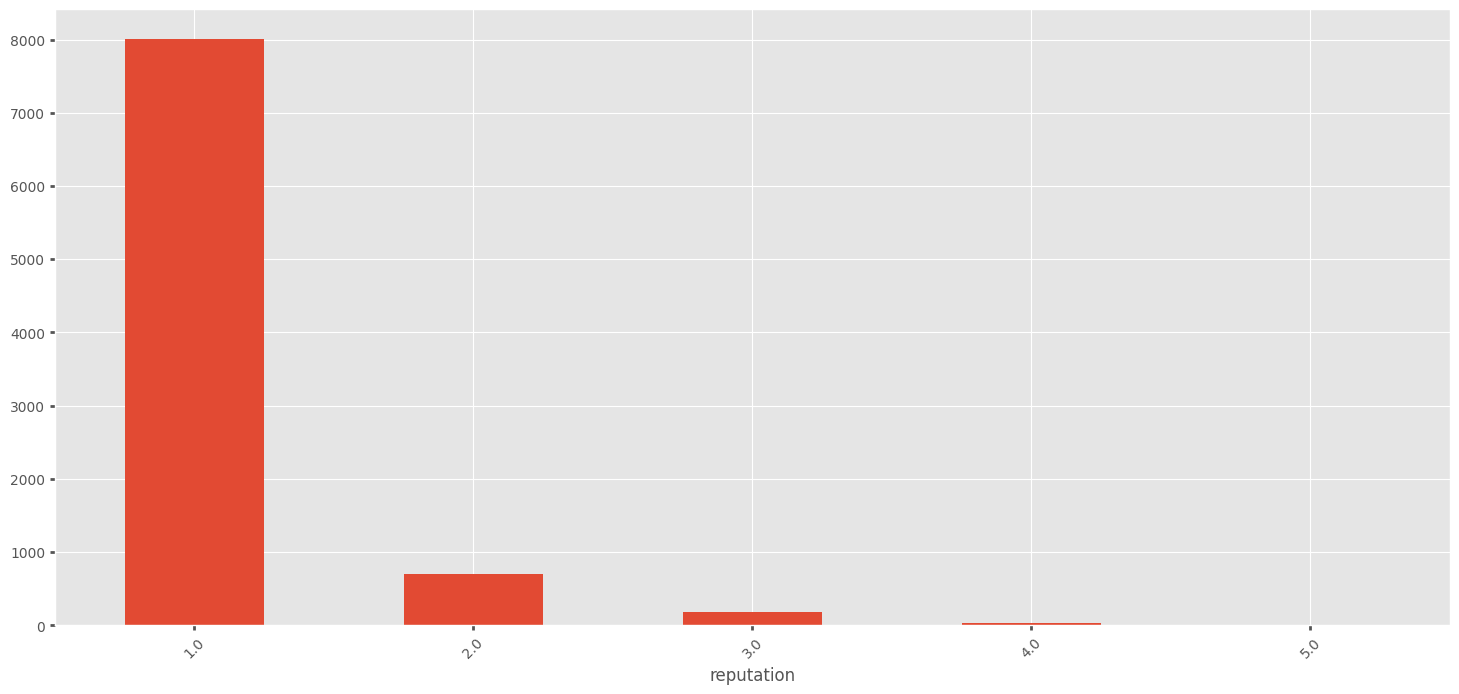

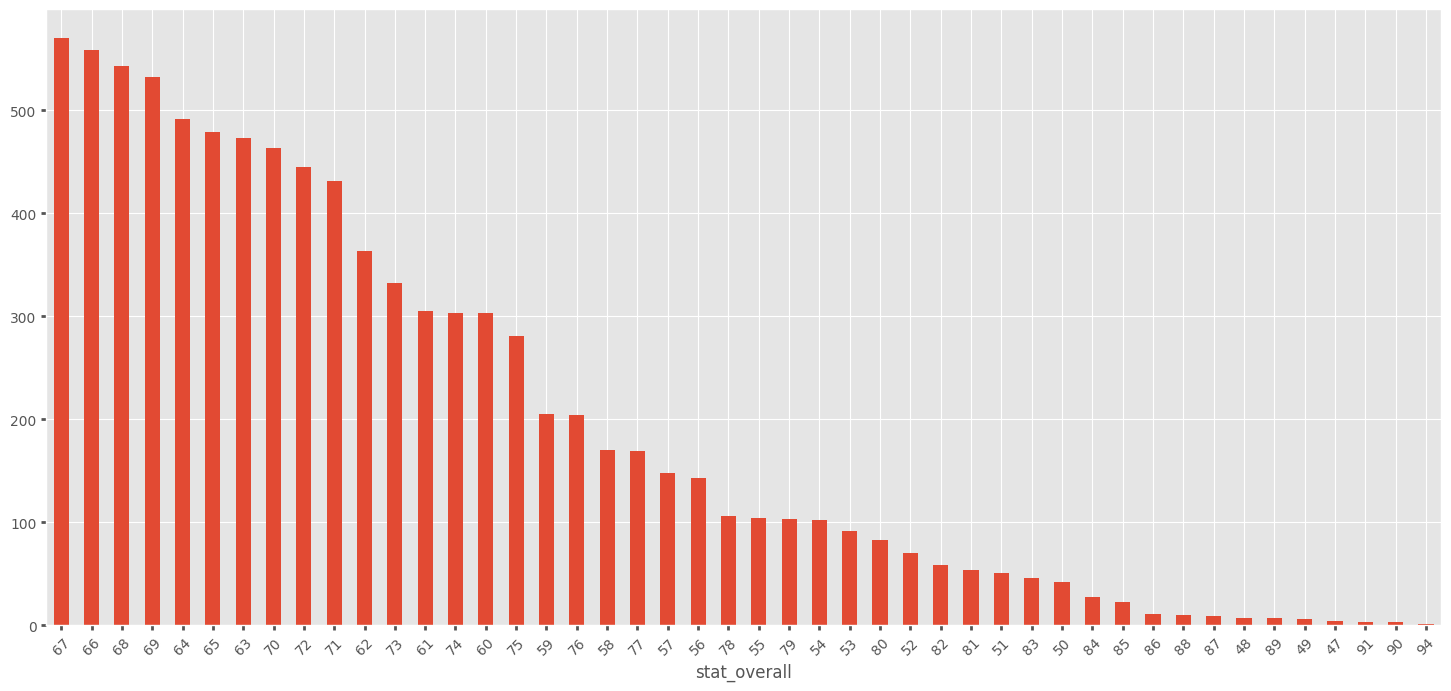

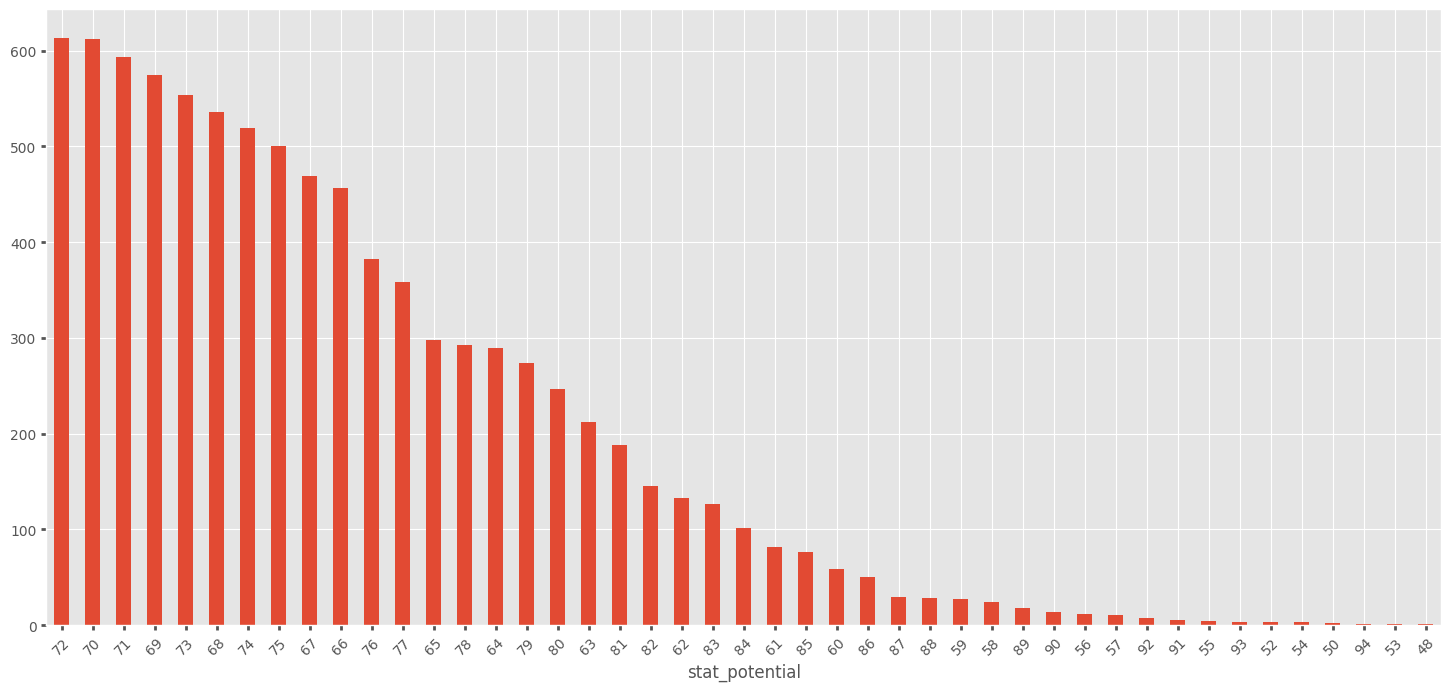

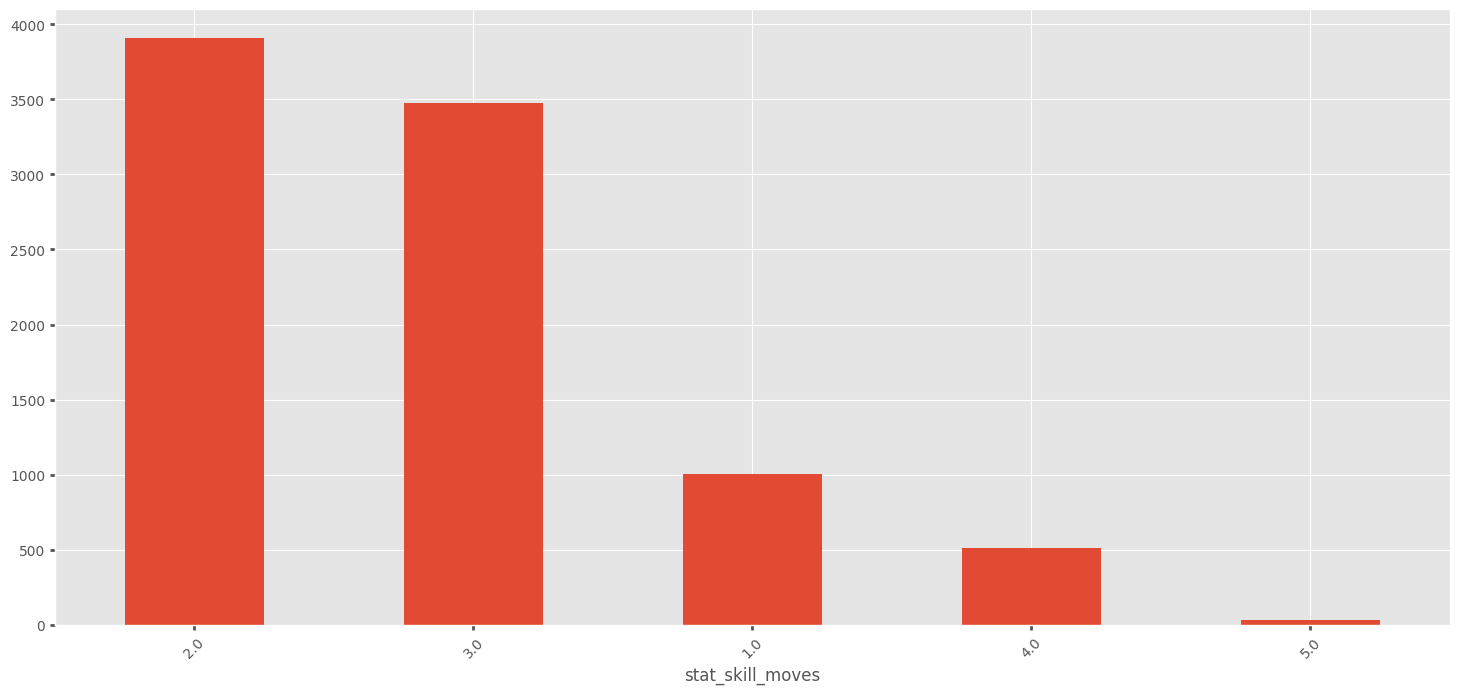

In [36]:
for x in X.columns:
    plt.figure(figsize=(18,8))
    data[x].value_counts().plot(kind='bar')
    plt.xlabel(x)
    plt.xticks(rotation=45)
    plt.tick_params(width=2)
    plt.show()

In [37]:
data['contract_until_year'] = data['contract_until'].apply(lambda x: x[-4:] if len(x) >=2 else x)
data['contract_until_year'].value_counts()

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until_year, dtype: int64

In [38]:
data['value'].sort_values()

8737        10000.0
8534        10000.0
8274        10000.0
8158        10000.0
8140        10000.0
           ...     
14       69500000.0
1        72000000.0
17       73500000.0
2        80000000.0
0       110500000.0
Name: value, Length: 8932, dtype: float64

In [39]:
# 0.77 * 1000 => (1000원 = 1300원) 의 비율 * 1000
data['value_won'] = data['value'].apply(lambda x: x*1299.65).astype(np.int64)

data['value_won']

0       143611325000
1        93574800000
2       103972000000
3        66282150000
4        88376200000
            ...     
8927        77979000
8928        51986000
8929        64982500
8930        64982500
8931        77979000
Name: value_won, Length: 8932, dtype: int64

In [40]:
'''
age_clean = 1 > 15~20
age_clean = 2 > 20~25
age_clean = 3 > 25~30
age_clean = 4 > 30~35
age_clean = 5 > 35~40


'''


data.loc[(data['age'] > 15) & (data['age'] <= 20), 'age_clean'] = 1
data.loc[(data['age'] > 20) & (data['age'] <= 26), 'age_clean'] = 2
data.loc[(data['age'] > 26) & (data['age'] <= 30), 'age_clean'] = 3
data.loc[(data['age'] > 30) & (data['age'] <= 36), 'age_clean'] = 4
data.loc[(data['age'] > 36) & (data['age'] <= 40), 'age_clean'] = 5

In [41]:
age_obj = {1.0:'15~20', 2.0:'20~25',3.0:'25~30',4.0:'30~35', 5.0:'35~40'}

data['age_obj'] = data['age_clean'].map(age_obj)
data['age_obj']

0       30~35
1       25~30
2       30~35
3       30~35
4       20~25
        ...  
8927    15~20
8928    15~20
8929    15~20
8930    15~20
8931    15~20
Name: age_obj, Length: 8932, dtype: object

In [42]:
data.head()

age      continent contract_until position prefer_foot  reputation  \
0   31  south america           2021       ST        left         5.0   
1   27         europe           2020       GK       right         4.0   
2   31  south america           2021       ST       right         5.0   
3   32         europe           2020       DF       right         4.0   
4   25         europe           2021       GK       right         3.0   

   stat_overall  stat_potential  stat_skill_moves        value  \
0            94              94               4.0  110500000.0   
1            91              93               1.0   72000000.0   
2            91              91               3.0   80000000.0   
3            91              91               3.0   51000000.0   
4            90              93               1.0   68000000.0   

  contract_until_year     value_won  age_clean age_obj  
0                2021  143611325000        4.0   30~35  
1                2020   93574800000        3.0   25~30  
2                2021  103972000000        4.0   30~35  
3                2020   66282150000        4.0   30~35  
4                2021   88376200000        2.0   20~25

In [43]:
data['stat_skill_moves'].value_counts()

2.0    3905
3.0    3473
1.0    1008
4.0     515
5.0      31
Name: stat_skill_moves, dtype: int64

In [44]:
data.head()

age      continent contract_until position prefer_foot  reputation  \
0   31  south america           2021       ST        left         5.0   
1   27         europe           2020       GK       right         4.0   
2   31  south america           2021       ST       right         5.0   
3   32         europe           2020       DF       right         4.0   
4   25         europe           2021       GK       right         3.0   

   stat_overall  stat_potential  stat_skill_moves        value  \
0            94              94               4.0  110500000.0   
1            91              93               1.0   72000000.0   
2            91              91               3.0   80000000.0   
3            91              91               3.0   51000000.0   
4            90              93               1.0   68000000.0   

  contract_until_year     value_won  age_clean age_obj  
0                2021  143611325000        4.0   30~35  
1                2020   93574800000        3.0   25~30  
2                2021  103972000000        4.0   30~35  
3                2020   66282150000        4.0   30~35  
4                2021   88376200000        2.0   20~25

In [45]:
data.groupby(['prefer_foot','position']).size().unstack()

position       DF   GK    MF    ST
prefer_foot                       
left          909   98   765   323
right        1882  910  2663  1382

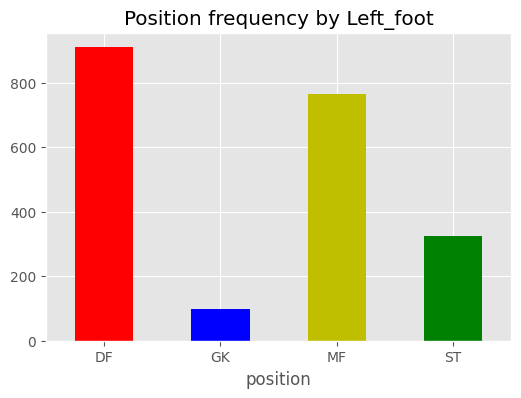

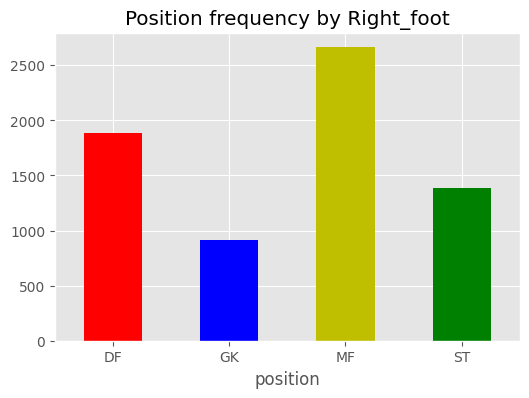

In [46]:
'''
주 발별 포지션의 빈도수
'''
plt.figure(figsize=(6,4))


data.groupby(['prefer_foot','position']).size()['left'].plot(kind='bar',color=['r','b','y','g'])
plt.title('Position frequency by Left_foot')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(6,4))
data.groupby(['prefer_foot','position']).size()['right'].plot(kind='bar',color=['r','b','y','g'])
plt.title('Position frequency by Right_foot')
plt.xticks(rotation=0)
plt.show()

In [47]:
# data.groupby(['prefer_foot','stat_skill_moves']).size()['left'].plot(kind='bar')
# plt.title('Position frequency by Left_foot')
# plt.xticks(rotation=0)
# plt.show()

# plt.figure(figsize=(6,4))
# data.groupby(['prefer_foot','stat_skill_moves']).size()['right'].plot(kind='bar')
# plt.title('Position frequency by Right_foot')
# plt.xticks(rotation=0)
# plt.show()

In [48]:
data.groupby(['position','stat_skill_moves']).size().unstack()

stat_skill_moves     1.0     2.0     3.0    4.0   5.0
position                                             
DF                   NaN  2153.0   615.0   23.0   NaN
GK                1008.0     NaN     NaN    NaN   NaN
MF                   NaN  1175.0  1924.0  309.0  20.0
ST                   NaN   577.0   934.0  183.0  11.0

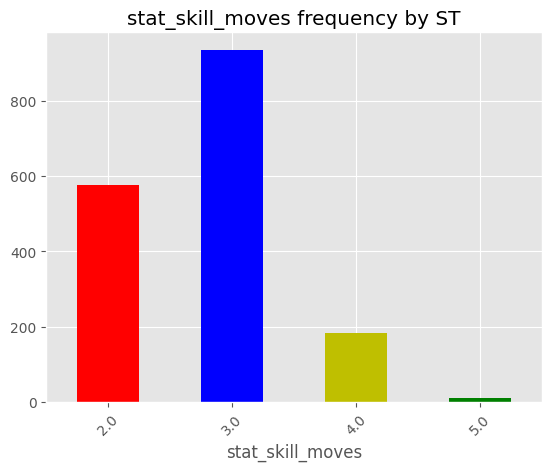

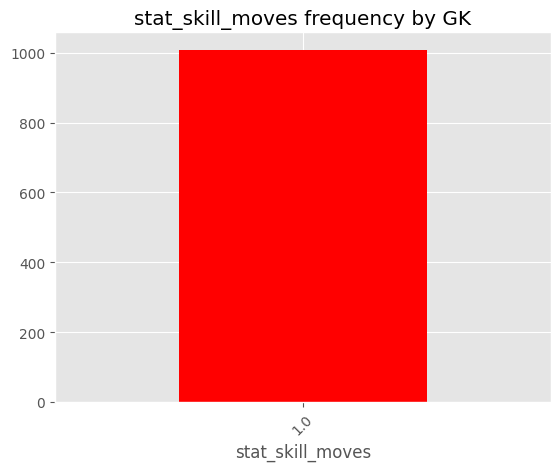

In [49]:
'''
포지션 별 개인기 능력치
'''
for x in data['position'].unique():
    
    data.groupby(['position','stat_skill_moves']).size()[x].plot(kind='bar', color=['r','b','y','g'])
    plt.title(f'stat_skill_moves frequency by {x}')
    plt.xticks(rotation=45)
    plt.show()

# plt.figure(figsize=(6,4))
# data.groupby(['position','stat_skill_moves']).size()['right'].plot(kind='bar')
# plt.title('Position frequency by Right_foot')
# plt.xticks(rotation=0)
# plt.show()

In [50]:
'''

단위(천만원)

최소 1300만원
    1.3

'''



data['won_round'] = data['value_won'].apply(lambda x: x/10000000 ).round(1)

data.loc[(data['won_round'] > 1) & (data['won_round'] <= 50), 'won_clean'] = 1
data.loc[(data['won_round'] > 50) & (data['won_round'] <= 100), 'won_clean'] = 2
data.loc[(data['won_round'] > 100) & (data['won_round'] <= 500), 'won_clean'] = 3
data.loc[(data['won_round'] > 500) & (data['won_round'] <= 1000), 'won_clean'] = 4
data.loc[data['won_round'] > 1000, 'won_clean'] = 5

In [51]:
'''
매핑시켜줌으로써 새로운 컬럼생성
시각화를 편하게 하기위해
'''

won_obj = {1.0:'1천~5억', 2.0:'5억~10억',3.0:'10억~50억',4.0:'50억~100억', 5.0:'100억이상'}

data['won_obj'] = data['won_clean'].map(won_obj)

data.head()

age      continent contract_until position prefer_foot  reputation  \
0   31  south america           2021       ST        left         5.0   
1   27         europe           2020       GK       right         4.0   
2   31  south america           2021       ST       right         5.0   
3   32         europe           2020       DF       right         4.0   
4   25         europe           2021       GK       right         3.0   

   stat_overall  stat_potential  stat_skill_moves        value  \
0            94              94               4.0  110500000.0   
1            91              93               1.0   72000000.0   
2            91              91               3.0   80000000.0   
3            91              91               3.0   51000000.0   
4            90              93               1.0   68000000.0   

  contract_until_year     value_won  age_clean age_obj  won_round  won_clean  \
0                2021  143611325000        4.0   30~35    14361.1        5.0   
1                2020   93574800000        3.0   25~30     9357.5        5.0   
2                2021  103972000000        4.0   30~35    10397.2        5.0   
3                2020   66282150000        4.0   30~35     6628.2        5.0   
4                2021   88376200000        2.0   20~25     8837.6        5.0   

  won_obj  
0  100억이상  
1  100억이상  
2  100억이상  
3  100억이상  
4  100억이상

In [52]:
data['won_obj'].value_counts()

10억~50억     2981
1천~5억       2241
5억~10억      2021
50억~100억     861
100억이상       828
Name: won_obj, dtype: int64

In [53]:
'''
선수 이적료의 빈도수
'''
print(data['won_obj'].value_counts(),'\n')

data['won_obj'].value_counts().plot(kind='bar',color=['r','b','y','g','black'])
plt.title('frequency of player price')
plt.xticks(rotation=0)

10억~50억     2981
1천~5억       2241
5억~10억      2021
50억~100억     861
100억이상       828
Name: won_obj, dtype: int64 



(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '10억~50억'),
  Text(1, 0, '1천~5억'),
  Text(2, 0, '5억~10억'),
  Text(3, 0, '50억~100억'),
  Text(4, 0, '100억이상')])

C:\Users\HP\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\HP\miniconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


In [54]:
data.head()

age      continent contract_until position prefer_foot  reputation  \
0   31  south america           2021       ST        left         5.0   
1   27         europe           2020       GK       right         4.0   
2   31  south america           2021       ST       right         5.0   
3   32         europe           2020       DF       right         4.0   
4   25         europe           2021       GK       right         3.0   

   stat_overall  stat_potential  stat_skill_moves        value  \
0            94              94               4.0  110500000.0   
1            91              93               1.0   72000000.0   
2            91              91               3.0   80000000.0   
3            91              91               3.0   51000000.0   
4            90              93               1.0   68000000.0   

  contract_until_year     value_won  age_clean age_obj  won_round  won_clean  \
0                2021  143611325000        4.0   30~35    14361.1        5.0   
1                2020   93574800000        3.0   25~30     9357.5        5.0   
2                2021  103972000000        4.0   30~35    10397.2        5.0   
3                2020   66282150000        4.0   30~35     6628.2        5.0   
4                2021   88376200000        2.0   20~25     8837.6        5.0   

  won_obj  
0  100억이상  
1  100억이상  
2  100억이상  
3  100억이상  
4  100억이상

In [55]:
data['age_obj'].value_counts()

20~25    4024
25~30    2061
15~20    1566
30~35    1203
35~40      78
Name: age_obj, dtype: int64

In [56]:
data[data['age_obj'] == '20~25']['won_round'].sum()/len(data[data['age_obj'] == '20~25'])

405.80825049701787

In [57]:
data.groupby(['age_obj'])['won_round'].mean()

age_obj
15~20    121.980460
20~25    405.808250
25~30    469.801747
30~35    355.837240
35~40     67.961538
Name: won_round, dtype: float64

In [58]:
'''
나이대 별 평균연봉 시각화
'''


for i,x in enumerate(data.groupby(['age_obj'])['won_round'].mean()):
    print(data.groupby(['age_obj'])['won_round'].mean().index[i],'의 평균 이적료 : ', int(x),'(천만원)')
    
    
data.groupby(['age_obj'])['won_round'].mean().plot(kind='bar', color=['r','b','y','g','black'])
plt.title('Age mean')
plt.xticks(rotation=0)

15~20 의 평균 이적료 :  121 (천만원)
20~25 의 평균 이적료 :  405 (천만원)
25~30 의 평균 이적료 :  469 (천만원)
30~35 의 평균 이적료 :  355 (천만원)
35~40 의 평균 이적료 :  67 (천만원)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '15~20'),
  Text(1, 0, '20~25'),
  Text(2, 0, '25~30'),
  Text(3, 0, '30~35'),
  Text(4, 0, '35~40')])

2019    2899
2021    2308
2020    2051
2022     761
2023     506
2018     391
2024      12
2025       3
2026       1
Name: contract_until_year, dtype: int64 

2018 의 평균 이적료 :  167 (천만원)
2019 의 평균 이적료 :  226 (천만원)
2020 의 평균 이적료 :  311 (천만원)
2021 의 평균 이적료 :  367 (천만원)
2022 의 평균 이적료 :  766 (천만원)
2023 의 평균 이적료 :  754 (천만원)
2024 의 평균 이적료 :  3185 (천만원)
2025 의 평균 이적료 :  1826 (천만원)
2026 의 평균 이적료 :  6563 (천만원)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021'),
  Text(4, 0, '2022'),
  Text(5, 0, '2023'),
  Text(6, 0, '2024'),
  Text(7, 0, '2025'),
  Text(8, 0, '2026')])

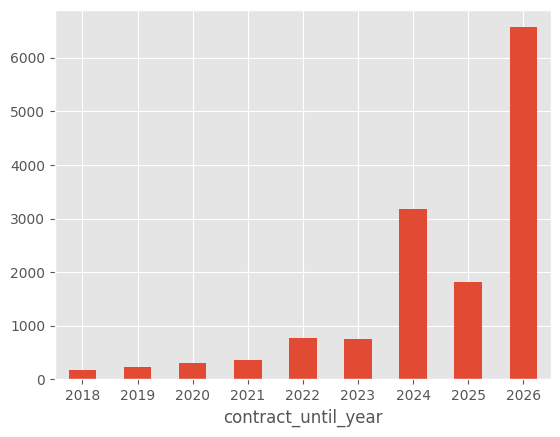

In [59]:
'''
계약기간을 년도별로 만들고 계약기간이 n년까지일때의 value 평균
'''
print(data['contract_until_year'].value_counts(),'\n')
for i,x in enumerate(data.groupby(['contract_until_year'])['won_round'].mean()):
    print(data.groupby(['contract_until_year'])['won_round'].mean().index[i],'의 평균 이적료 : ', int(x),'(천만원)')
    

data.groupby(['contract_until_year'])['won_round'].mean().plot(kind='bar')
plt.xticks(rotation=0)

In [60]:
data[data['contract_until_year'] == '2026']

age continent contract_until position prefer_foot  reputation  \
48   23    europe           2026       MF        left         3.0   

    stat_overall  stat_potential  stat_skill_moves       value  \
48            85              90               3.0  50500000.0   

   contract_until_year    value_won  age_clean age_obj  won_round  won_clean  \
48                2026  65632325000        2.0   20~25     6563.2        5.0   

   won_obj  
48  100억이상

In [61]:
k = pd.read_csv('FIFA_train.csv')
k.loc[48]

id                          83
name                      Saúl
age                         23
continent               europe
contract_until            2026
position                    MF
prefer_foot               left
reputation                 3.0
stat_overall                85
stat_potential              90
stat_skill_moves           3.0
value               50500000.0
Name: 48, dtype: object

In [62]:
'''
포지션별 평균
'''
print(data['position'].value_counts(),'\n')

for i,x in enumerate(data.groupby(['position'])['won_round'].mean()):
    print(data.groupby(['position'])['won_round'].mean().index[i],'의 평균 이적료 : ', int(x),'(천만원)')

data.groupby(['position'])['won_round'].mean().plot(kind='bar')
plt.xticks(rotation=0)

MF    3428
DF    2791
ST    1705
GK    1008
Name: position, dtype: int64 

DF 의 평균 이적료 :  299 (천만원)
GK 의 평균 이적료 :  258 (천만원)
MF 의 평균 이적료 :  405 (천만원)
ST 의 평균 이적료 :  432 (천만원)


(array([0, 1, 2, 3]),
 [Text(0, 0, 'DF'), Text(1, 0, 'GK'), Text(2, 0, 'MF'), Text(3, 0, 'ST')])

In [63]:
'''
대륙별 평균
'''
print(data['continent'].value_counts(),'\n')

for i,x in enumerate(data.groupby(['continent'])['won_round'].mean()):
    print(data.groupby(['continent'])['won_round'].mean().index[i],'선수들 의 평균 이적료 : ', int(x),'(천만원)')

data.groupby(['continent'])['won_round'].mean().plot(kind='bar')
plt.xticks(rotation=0)

europe           5322
south america    1927
asia              787
africa            721
oceania           175
Name: continent, dtype: int64 

africa 선수들 의 평균 이적료 :  386 (천만원)
asia 선수들 의 평균 이적료 :  134 (천만원)
europe 선수들 의 평균 이적료 :  380 (천만원)
oceania 선수들 의 평균 이적료 :  106 (천만원)
south america 선수들 의 평균 이적료 :  413 (천만원)


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'africa'),
  Text(1, 0, 'asia'),
  Text(2, 0, 'europe'),
  Text(3, 0, 'oceania'),
  Text(4, 0, 'south america')])

In [64]:
data['value_won'].sort_values()

8737        12996500
8534        12996500
8274        12996500
8158        12996500
8140        12996500
            ...     
14       90325675000
1        93574800000
17       95524275000
2       103972000000
0       143611325000
Name: value_won, Length: 8932, dtype: int64

In [65]:
data

age      continent contract_until position prefer_foot  reputation  \
0      31  south america           2021       ST        left         5.0   
1      27         europe           2020       GK       right         4.0   
2      31  south america           2021       ST       right         5.0   
3      32         europe           2020       DF       right         4.0   
4      25         europe           2021       GK       right         3.0   
...   ...            ...            ...      ...         ...         ...   
8927   18         africa           2019       MF       right         1.0   
8928   19         europe           2020       DF       right         1.0   
8929   18  south america           2021       DF       right         1.0   
8930   18         europe           2021       GK       right         1.0   
8931   19         europe           2020       ST       right         1.0   

      stat_overall  stat_potential  stat_skill_moves        value  \
0               94              94               4.0  110500000.0   
1               91              93               1.0   72000000.0   
2               91              91               3.0   80000000.0   
3               91              91               3.0   51000000.0   
4               90              93               1.0   68000000.0   
...            ...             ...               ...          ...   
8927            48              63               3.0      60000.0   
8928            47              59               2.0      40000.0   
8929            47              64               2.0      50000.0   
8930            47              65               1.0      50000.0   
8931            47              63               2.0      60000.0   

     contract_until_year     value_won  age_clean age_obj  won_round  \
0                   2021  143611325000        4.0   30~35    14361.1   
1                   2020   93574800000        3.0   25~30     9357.5   
2                   2021  103972000000        4.0   30~35    10397.2   
3                   2020   66282150000        4.0   30~35     6628.2   
4                   2021   88376200000        2.0   20~25     8837.6   
...                  ...           ...        ...     ...        ...   
8927                2019      77979000        1.0   15~20        7.8   
8928                2020      51986000        1.0   15~20        5.2   
8929                2021      64982500        1.0   15~20        6.5   
8930                2021      64982500        1.0   15~20        6.5   
8931                2020      77979000        1.0   15~20        7.8   

      won_clean won_obj  
0           5.0  100억이상  
1           5.0  100억이상  
2           5.0  100억이상  
3           5.0  100억이상  
4           5.0  100억이상  
...         ...     ...  
8927        1.0   1천~5억  
8928        1.0   1천~5억  
8929        1.0   1천~5억  
8930        1.0   1천~5억  
8931        1.0   1천~5억  

[8932 rows x 17 columns]